# Notebook Contents

- [Library Imports](#Imports)
- [Dataset](#Data)
- [Season Overview](#2021-MLB-Season-Overview---Pitchers)
- [Pitcher Overview](#Pitcher-Overview)
    - [Kershaw](#Clayton-Kershaw)
    - [Scherzer](#Max-Scherzer)
    - [Allard](#Kolby-Allard)

# Imports

In [1]:
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
data = pd.read_csv('./data/mlb-pitches.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True) 

# Create is_strike column
data['is_strike'] = [1 if x != 'B' else 0 for x in data['type']]
# Create pitch_count column
data['pitch_count'] = data[['balls', 'strikes']].astype(str).agg('-'.join, axis = 1)

data['description'].replace(['blocked_ball', 'foul_tip', 'swinging_strike_blocked', 'foul_bunt'], 
                            ['ball', 'foul', 'swinging_strike', 'foul'], inplace = True)
# Make all events that aren't hits, outs
data['events'].replace(['field_out', 'grounded_into_double_play', 'sac_fly', 'force_out', 'hit_by_pitch', 
                        'field_error', 'fielders_choice', 'fielders_choice_out'], 'out', inplace = True)
# make swing_miss column
data['swing_miss'] = [1 if x == 'swinging_strike' else 0 for x in data['description']]

font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(data.shape)
data.head(3)

(708653, 89)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,plate_-x,pfx_-x,is_strike,pitch_count,swing_miss
0,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019,519293,out,hit_into_play,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1,2,2021,8.28,16.56,-0.69,2.83,NaN,NaN,NaN,2,9,Top,77.54,155.31,518595.0,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.174,0.158,0.0,1.0,0.0,0.0,2.0,61,4,4-Seam Fastball,5,0,0,5,0,5,0,5,Infield shift,Strategic,148.0,0.0,-0.073,0.69,-8.28,1,1-2,0
1,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019,519293,NaN,foul,4.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,1,2021,-9.24,5.76,-0.71,2.62,NaN,NaN,NaN,2,9,Top,NaN,NaN,518595.0,-3.700232,-117.430885,-3.266842,-6.531123,19.793390,-27.369114,3.32,1.51,108.0,75.3,75.0,81.2,2254.0,6.4,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,3,Slider,5,0,0,5,0,5,0,5,Infield shift,Strategic,315.0,0.0,-0.027,0.71,9.24,1,1-1,0
2,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019,519293,NaN,foul,5.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,0,2021,-7.80,-6.12,-0.04,2.46,NaN,NaN,NaN,2,9,Top,NaN,NaN,518595.0,-1.977183,-109.901781,-1.155694,-4.872924,20.602334,-36.262184,3.32,1.51,157.0,83.5,65.0,75.2,1940.0,6.2,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,2,Curveball,5,0,0,5,0,5,0,5,Infield shift,Standard,328.0,0.0,-0.020,0.04,7.80,1,1-0,0


In [3]:
#data.info()

In [4]:
data.pitch_type.value_counts(normalize = True)

FF    0.353774
SL    0.193090
SI    0.154934
CH    0.113930
CU    0.083119
FC    0.066390
KC    0.019392
FS    0.015372
Name: pitch_type, dtype: float64

### Slice DataFrame

In [5]:
ff = data.loc[data['pitch_type'] == 'FF']
sl = data.loc[data['pitch_type'] == 'SL']
si = data.loc[data['pitch_type'] == 'SI']
ch = data.loc[data['pitch_type'] == 'CH']
cu = data.loc[data['pitch_type'] == 'CU']
fc = data.loc[data['pitch_type'] == 'FC']
kc = data.loc[data['pitch_type'] == 'KC']
fs = data.loc[data['pitch_type'] == 'FS']

In [6]:
# USA Baseball Alum
minter = data.loc[data['player_name'] == 'Minter, AJ'].copy()
gray = data.loc[data['player_name'] == 'Gray, Sonny'].copy()
kershaw = data.loc[data['player_name'] == 'Kershaw, Clayton'].copy()
allard = data.loc[data['player_name'] == 'Allard, Kolby'].copy()
scherzer = data.loc[data['player_name'] == 'Scherzer, Max'].copy()

# 2021 MLB Season Overview - Pitchers

### All Pitchers' Velocity - 2021 Season

<Figure size 576x576 with 0 Axes>

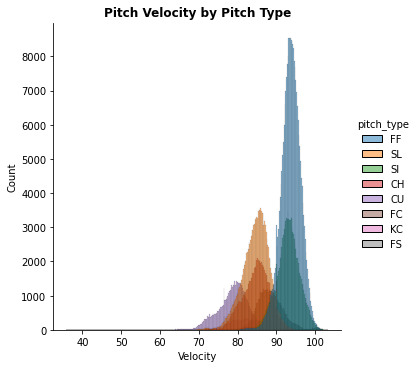

In [7]:
plt.figure(figsize = (8, 8))

sns.displot(data = data, x = 'release_speed', hue = 'pitch_type', 
            hue_order = ['FF', 'SL', 'SI', 'CH', 'CU', 'FC', 'KC', 'FS'], 
            palette = 'tab10')
plt.xlabel('Velocity')
plt.title('Pitch Velocity by Pitch Type', fontdict = font_title, pad = 12);

### All Pitches - 2021 Season

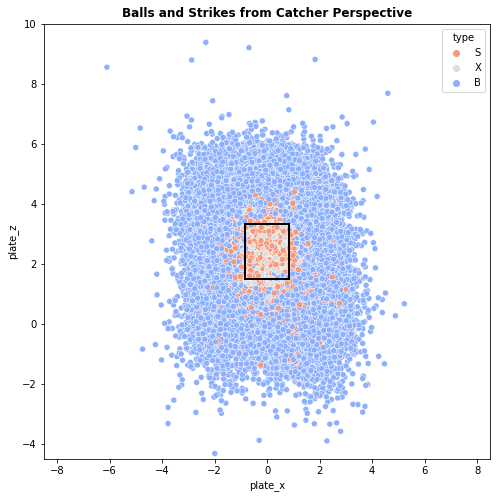

In [8]:
plt.figure(figsize = (8, 8))

sns.scatterplot(data = data, x = 'plate_x', y = 'plate_z', 
                hue = 'type', hue_order = ['S','X', 'B'], 
                palette = 'coolwarm_r')
plt.xlim(-8.5, 8.5)
plt.ylim(-4.5, 10)
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height, 
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Balls and Strikes from Catcher Perspective', fontdict = font_title, pad = 12);

In [9]:
# USA Baseball colors
blue = '#002D72'
red = '#D50032'

# Pitcher Overview

## Clayton Kershaw

In [10]:
sl = kershaw.loc[kershaw['pitch_type'] == 'SL']
ff = kershaw.loc[kershaw['pitch_type'] == 'FF']
cu = kershaw.loc[kershaw['pitch_type'] == 'CU']
ch = kershaw.loc[kershaw['pitch_type'] == 'CH']

r_sl = kershaw.loc[(kershaw['pitch_type'] == 'SL') & (kershaw['stand'] == 'R')]
r_ff = kershaw.loc[(kershaw['pitch_type'] == 'FF') & (kershaw['stand'] == 'R')]
r_cu = kershaw.loc[(kershaw['pitch_type'] == 'CU') & (kershaw['stand'] == 'R')]
r_ch = kershaw.loc[(kershaw['pitch_type'] == 'CH') & (kershaw['stand'] == 'R')]

l_sl = kershaw.loc[(kershaw['pitch_type'] == 'SL') & (kershaw['stand'] == 'L')]
l_ff = kershaw.loc[(kershaw['pitch_type'] == 'FF') & (kershaw['stand'] == 'L')]
l_cu = kershaw.loc[(kershaw['pitch_type'] == 'CU') & (kershaw['stand'] == 'L')]
l_ch = kershaw.loc[(kershaw['pitch_type'] == 'CH') & (kershaw['stand'] == 'L')]

kershaw_order = ['SL', 'FF', 'CU', 'CH']

In [11]:
kershaw.pitch_type.value_counts(normalize=True)

SL    0.476190
FF    0.366556
CU    0.151163
CH    0.006091
Name: pitch_type, dtype: float64

In [12]:
kershaw.pitch_type.value_counts()

SL    860
FF    662
CU    273
CH     11
Name: pitch_type, dtype: int64

In [13]:
r_ch.type.value_counts()

B    8
X    1
S    1
Name: type, dtype: int64

In [14]:
l_ch.type.value_counts()

S    1
Name: type, dtype: int64

Slider velo sits: 86 - 88 mph,  max: 90.5 mph
4-Seam velo sits: 90 - 91 mph,  max: 92.9 mph
Curve velo sits: 74 - 75 mph,  max: 77.1 mph
Changeup velo sits: 86 - 88 mph,  max: 89.3 mph


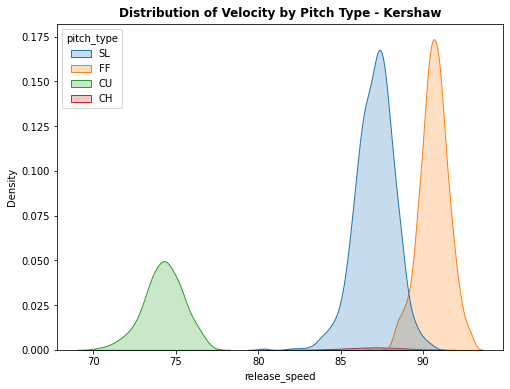

In [15]:
plt.figure(figsize = (8, 6))

ax = sns.kdeplot(data = kershaw, x = 'release_speed', shade = 'fill', hue = 'pitch_type',
            hue_order = kershaw_order, palette = 'tab10')
sns.move_legend(ax, 'upper left')
plt.title('Distribution of Velocity by Pitch Type - Kershaw', fontdict = font_title, pad = 12);
print('Slider velo sits:',round(sl['release_speed'].quantile(.25)),'-',round(sl['release_speed'].quantile(.75)), 
      'mph, ','max:',round(sl['release_speed'].max(),2),'mph')
print('4-Seam velo sits:',round(ff['release_speed'].quantile(.25)),'-',round(ff['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ff['release_speed'].max(), 2), 'mph')
print('Curve velo sits:',round(cu['release_speed'].quantile(.25)),'-',round(cu['release_speed'].quantile(.75)), 
      'mph, ','max:',round(cu['release_speed'].max(), 2),'mph')
print('Changeup velo sits:',round(ch['release_speed'].quantile(.25)),'-',round(ch['release_speed'].quantile(.75)),
      'mph, ','max:',round(ch['release_speed'].max(), 2),'mph')

### Release Position

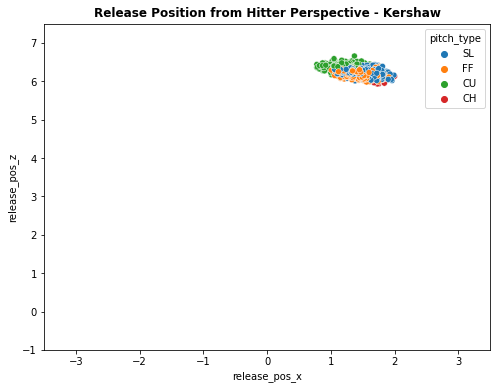

In [16]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                hue_order = kershaw_order, palette = 'tab10')
plt.xlim(-3.5, 3.5)
plt.ylim(-1, 7.5)
plt.title('Release Position from Hitter Perspective - Kershaw', fontdict = font_title, pad = 12);

## Pitcher Stuff

### Velocity & Spin Rate by Pitch Type

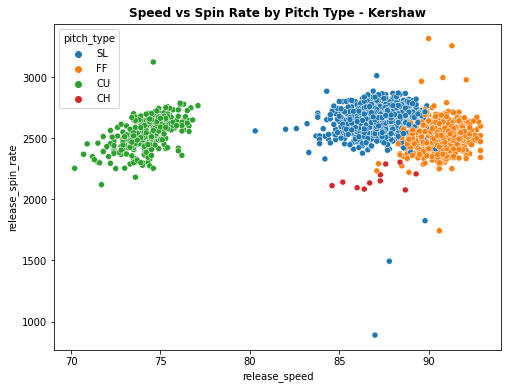

In [17]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
               hue_order = kershaw_order, palette = 'tab10')
plt.title('Speed vs Spin Rate by Pitch Type - Kershaw', fontdict = font_title, pad = 12);

### Horizontal & Vertical Break Axis

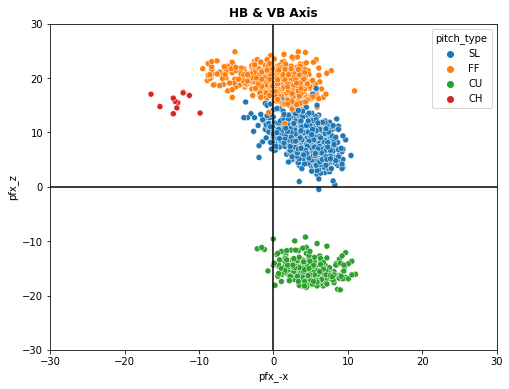

In [18]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = kershaw_order, palette = 'tab10')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 12);

### Slider Heatmap

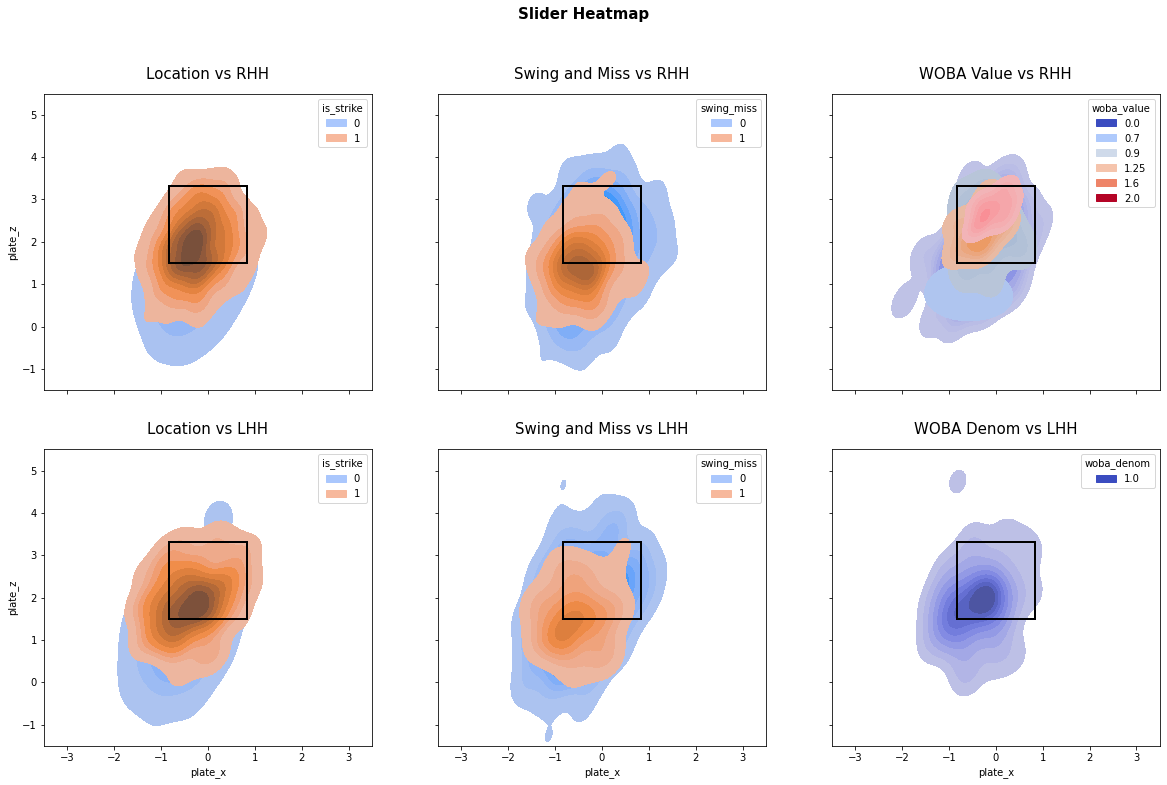

In [19]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 15, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_sl,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_sl,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='woba_denom',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Denom vs LHH', fontsize = 15, pad = 15);

### Fastball Heatmaps

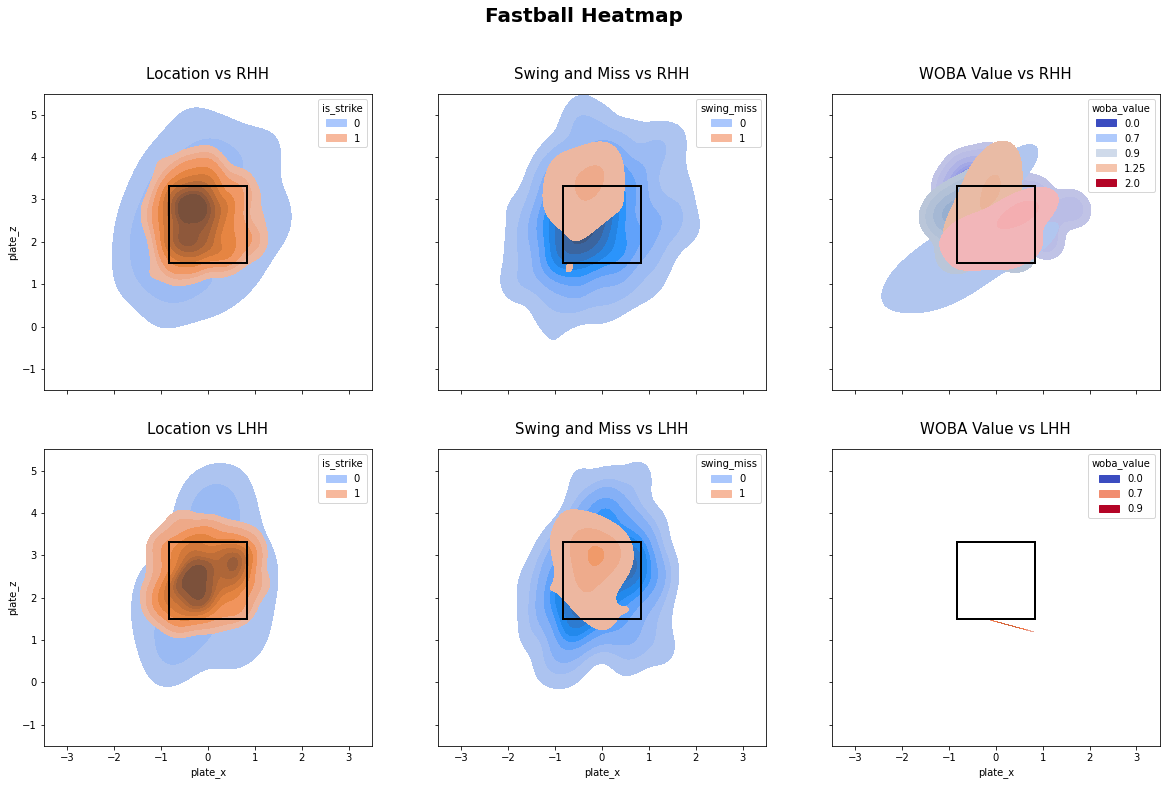

In [20]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_ff,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_ff,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Curveball Heatmaps

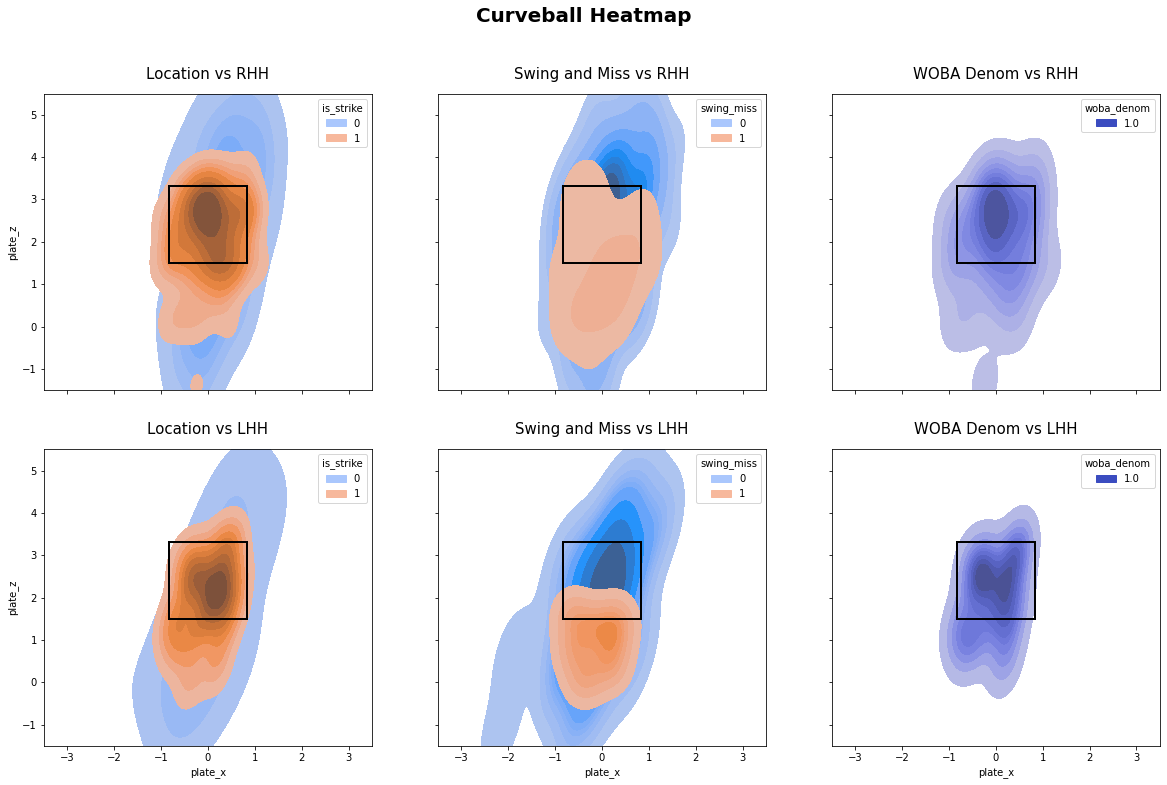

In [21]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_cu,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_cu,x='plate_x',y='plate_z',fill=True,hue='woba_denom',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Denom vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_cu,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_cu,x='plate_x',y='plate_z',fill=True,hue='woba_denom',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Denom vs LHH', fontsize = 15, pad = 15);

### Changeup Heatmaps

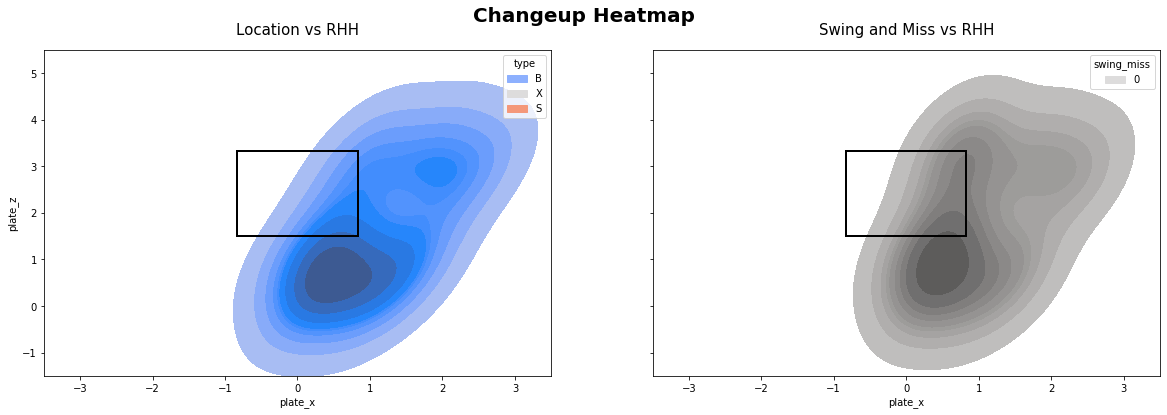

In [22]:
fig, axs = plt.subplots(1, 2, figsize = (20, 6), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0],data=r_ch,x='plate_x',y='plate_z',fill=True,hue = 'type',palette='coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1],data=r_ch,x='plate_x',y='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15);

## Max Scherzer

In [23]:
ff = scherzer.loc[scherzer['pitch_type'] == 'FF']
sl = scherzer.loc[scherzer['pitch_type'] == 'SL']
ch = scherzer.loc[scherzer['pitch_type'] == 'CH']
cu = scherzer.loc[scherzer['pitch_type'] == 'CU']
fc = scherzer.loc[scherzer['pitch_type'] == 'FC']

r_ff = scherzer.loc[(scherzer['pitch_type'] == 'FF') & (scherzer['stand'] == 'R')]
r_sl = scherzer.loc[(scherzer['pitch_type'] == 'SL') & (scherzer['stand'] == 'R')]
r_ch = scherzer.loc[(scherzer['pitch_type'] == 'CH') & (scherzer['stand'] == 'R')]
r_cu = scherzer.loc[(scherzer['pitch_type'] == 'CU') & (scherzer['stand'] == 'R')]
r_fc = scherzer.loc[(scherzer['pitch_type'] == 'FC') & (scherzer['stand'] == 'R')]

l_ff = scherzer.loc[(scherzer['pitch_type'] == 'FF') & (scherzer['stand'] == 'L')]
l_sl = scherzer.loc[(scherzer['pitch_type'] == 'SL') & (scherzer['stand'] == 'L')]
l_ch = scherzer.loc[(scherzer['pitch_type'] == 'CH') & (scherzer['stand'] == 'L')]
l_cu = scherzer.loc[(scherzer['pitch_type'] == 'CU') & (scherzer['stand'] == 'L')]
l_fc = scherzer.loc[(scherzer['pitch_type'] == 'FC') & (scherzer['stand'] == 'L')]

scherzer_order = ['FF', 'SL', 'CH', 'CU', 'FC']

In [24]:
scherzer.pitch_type.value_counts(normalize=True)

FF    0.466501
SL    0.195321
CH    0.149238
CU    0.098192
FC    0.090748
Name: pitch_type, dtype: float64

### Kolby Allard

In [25]:
allard.pitch_type.value_counts(normalize=True)

FF    0.469328
FC    0.247809
CH    0.168452
CU    0.110516
SI    0.003895
Name: pitch_type, dtype: float64